In [74]:
import numpy as np
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from emily import *

Using TensorFlow backend.


In [195]:
d=dirlist('/home/vasileios.skliris/EMILY/injections/cbcs/cbc_00/H')
inj0=load_inj('cbc_00',d[np.random.randint(0,len(d))],'H')


16.476302103465507
23.772473043028025
16.55572771110556
22.09157113219099
16.97474647142677
21.149038738116847


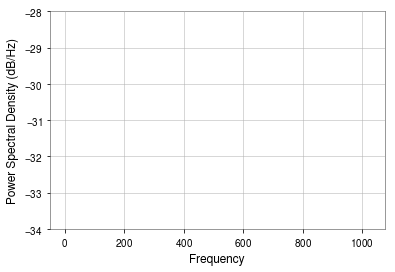

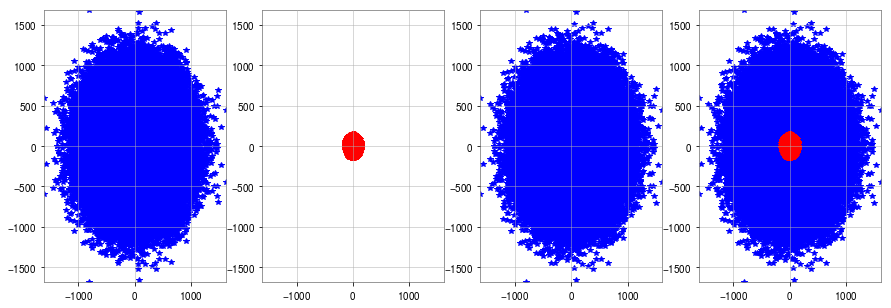

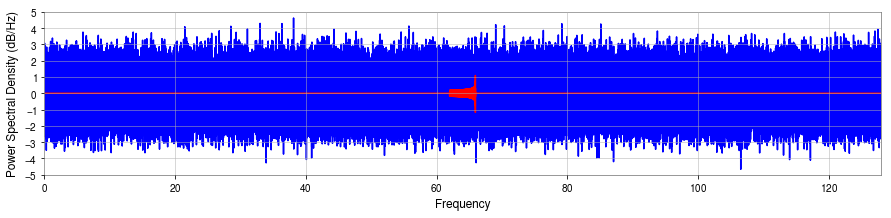

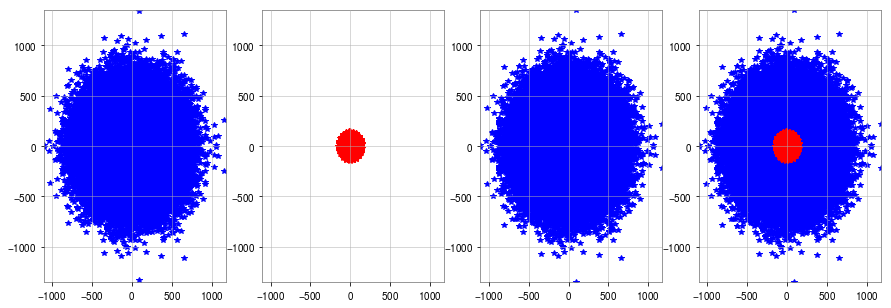

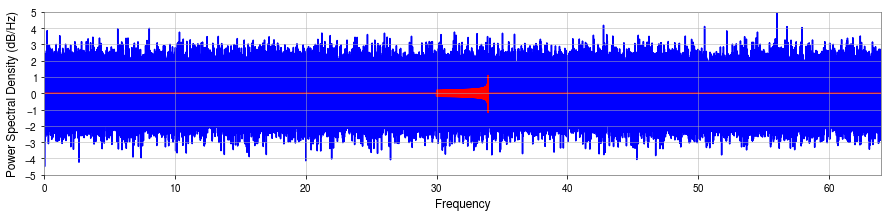

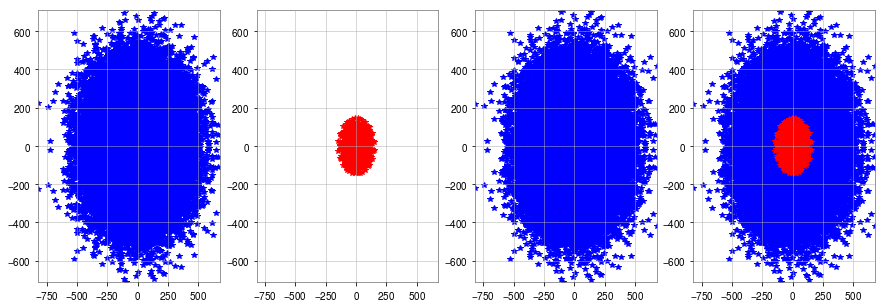

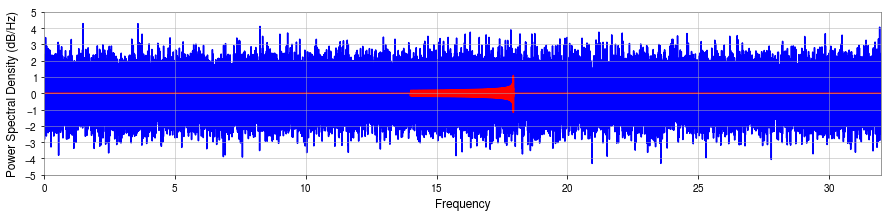

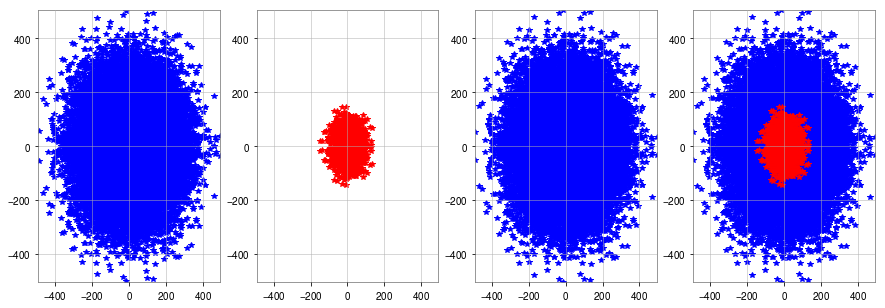

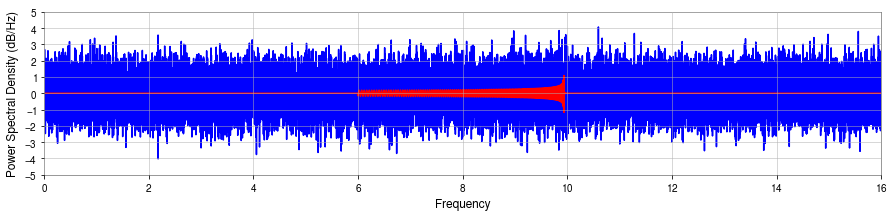

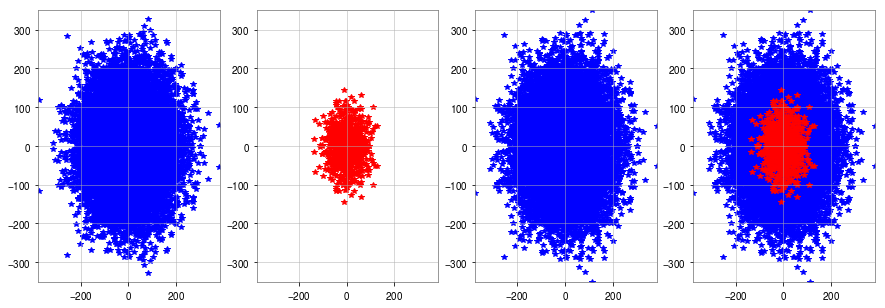

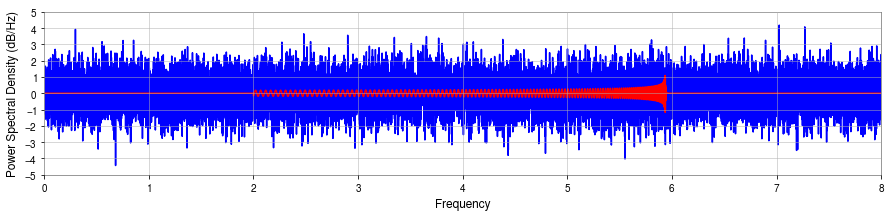

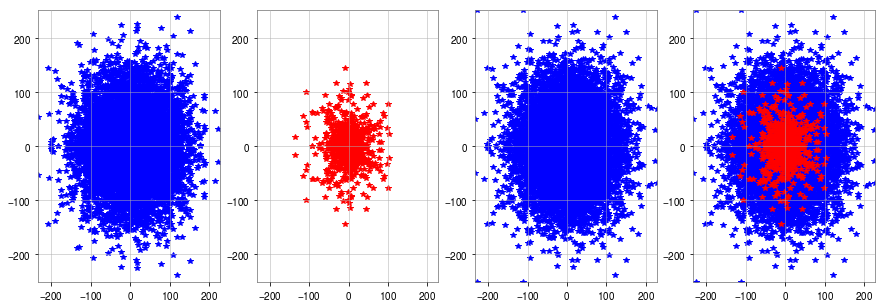

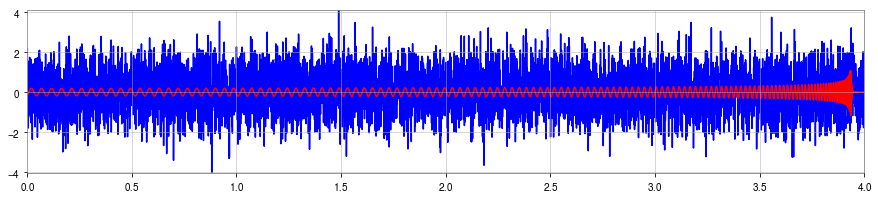

In [207]:
fs=2048
inj=1e21*inj0


l=32
for l in [128,64,32,16,8,4]:
    t=np.arange(0,l,1/fs)
    noise=np.random.randn(len(t))

    signal=np.hstack((np.zeros(np.int(fs*(l-4)/2)), inj ,np.zeros(np.int(fs*(l-4)/2))))

    data=signal+noise

    fft_noise=np.fft.fft(noise)
    fft_signal=np.fft.fft(signal)
    fft_data=np.fft.fft(data)


    print(SNR(data,signal,noise,maximum=True,fs=2048))

    Rn,In=[],[]
    for num in fft_noise:
        Rn.append(num.real)
        In.append(num.imag)

    Rs,Is=[],[]
    for num in fft_signal:
        Rs.append(num.real)
        Is.append(num.imag)

    Rd,Id=[],[]
    for num in fft_data:
        Rd.append(num.real)
        Id.append(num.imag)
        
    plt.figure(figsize=(15,5))

    plt.subplot(1,4,1)
    plt.plot(Rn,In,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,2)
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,3)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,4)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.figure(figsize=(15,3))
    plt.plot(t,signal+noise,'b')
    plt.plot(t,signal,'r')
    #plt.xlim(int(l/2-2), int(l/2+2))
    plt.xlim(0,l)
    plt.ylim(np.min(signal+noise), np.max(signal+noise))


    plt.show()

82.48061143279357
21.75305622786523
20.19095642684385
33.30641678299575
78.84778224610453
47.69384938908818


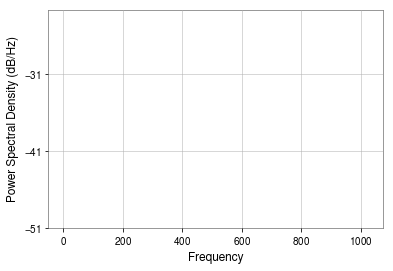

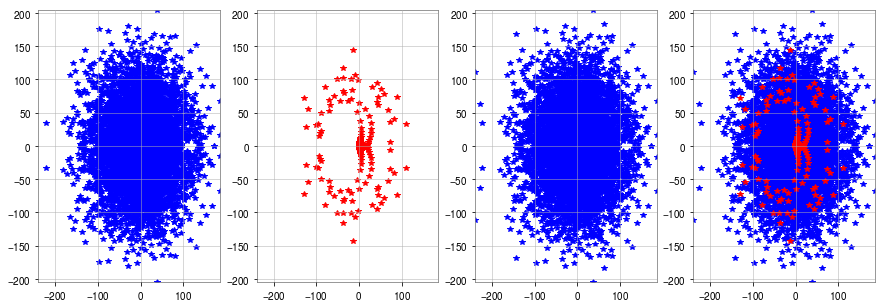

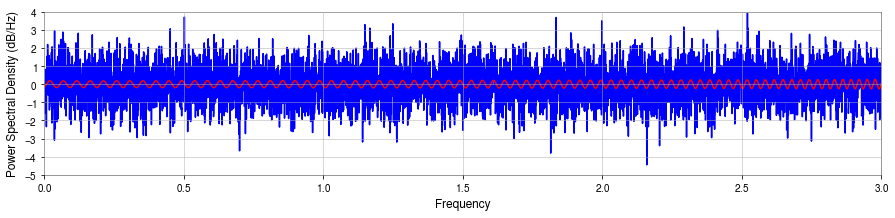

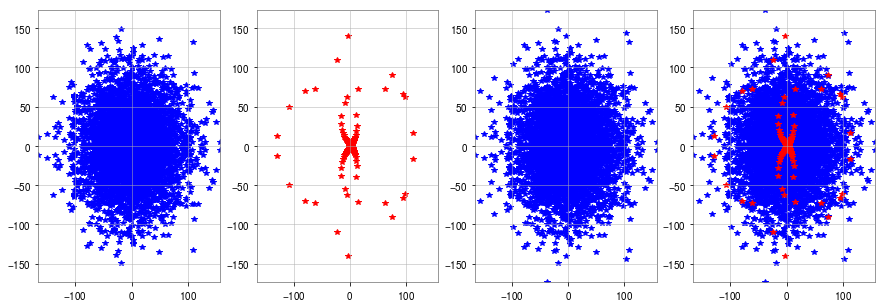

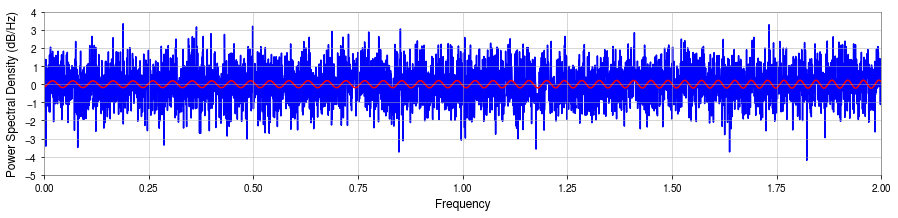

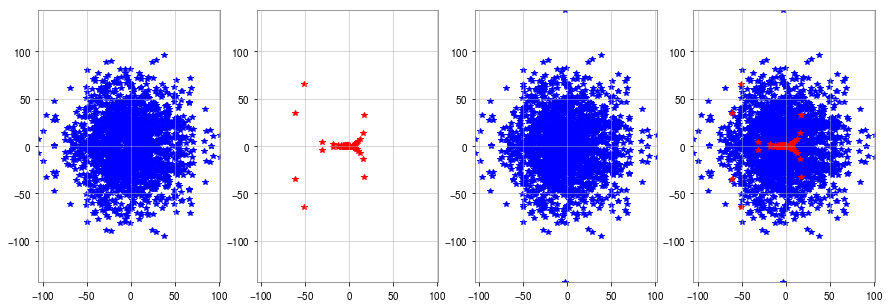

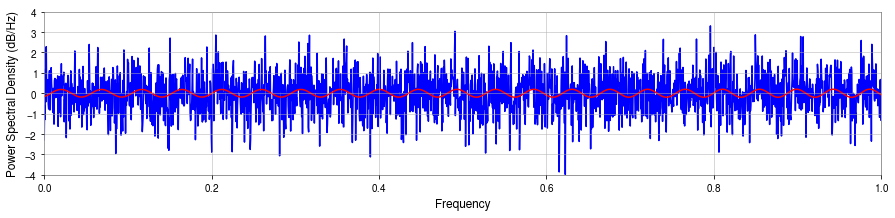

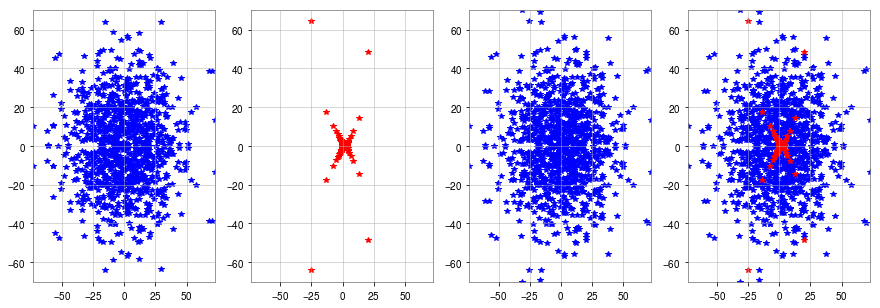

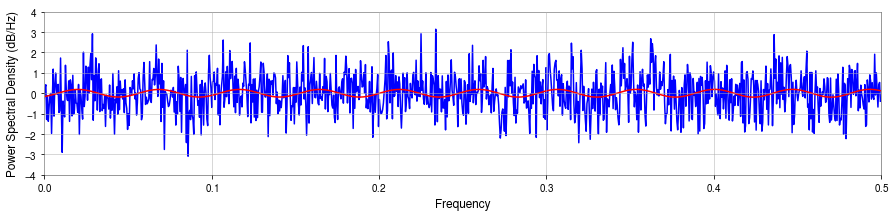

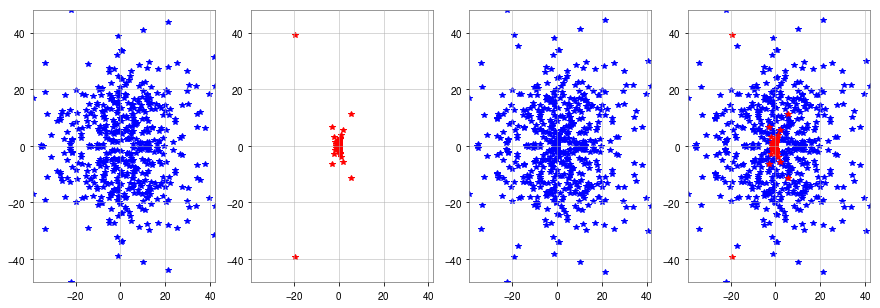

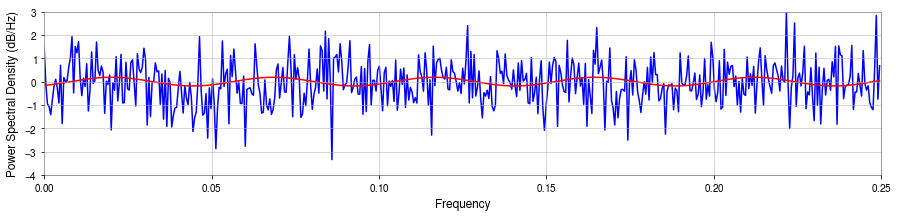

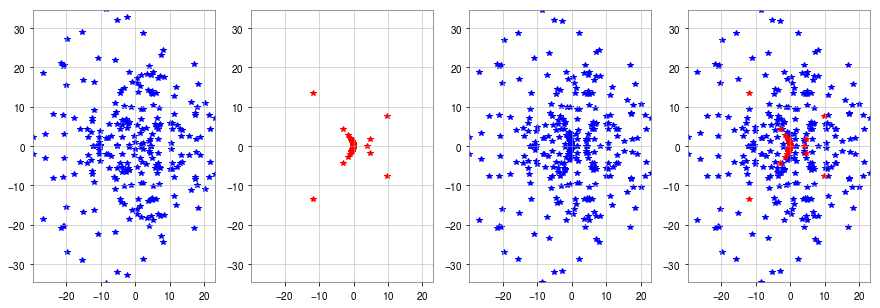

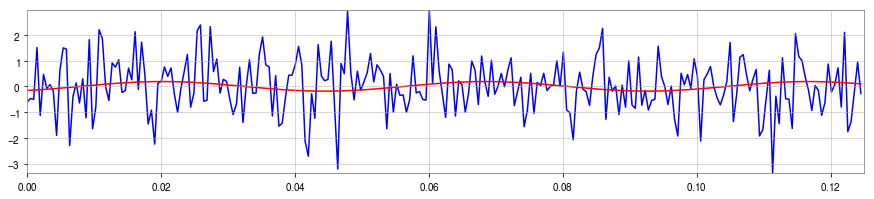

In [230]:
fs=2048
l=1

for l in [3,2,1,0.5,0.25,0.125]:
    t=np.arange(0,l,1/fs)#np.arange(4-l,4,1/fs)###
    noise=np.random.randn(len(t))
    signal=inj[0:int(l*fs)]#inj[int((4-l)*fs):]#

    data=signal+noise

    fft_noise=np.fft.fft(noise)
    fft_signal=np.fft.fft(signal)
    fft_data=np.fft.fft(data)


    print(SNR(data,signal,noise,maximum=True,fs=2048))

    Rn,In=[],[]
    for num in fft_noise:
        Rn.append(num.real)
        In.append(num.imag)

    Rs,Is=[],[]
    for num in fft_signal:
        Rs.append(num.real)
        Is.append(num.imag)

    Rd,Id=[],[]
    for num in fft_data:
        Rd.append(num.real)
        Id.append(num.imag)
    plt.figure(figsize=(15,5))


    plt.subplot(1,4,1)
    plt.plot(Rn,In,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,2)
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,3)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,4)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.figure(figsize=(15,3))
    plt.plot(t,signal+noise,'b')
    plt.plot(t,signal,'r')
    plt.xlim(0, l)
    #plt.xlim(4-l,4)
    plt.ylim(np.min(signal+noise), np.max(signal+noise))



    plt.show()

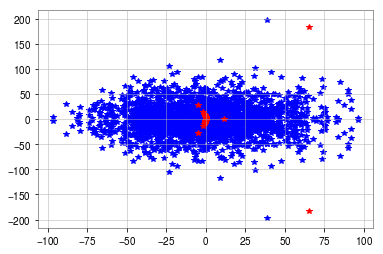

In [26]:
fft_noise[0].imag

0.0

In [280]:
path='/home/vasileios.skliris/EMILY/datasets/noise/real/real_test2'

files=dirlist(path)

print('Running diagnostics for file: '+path+'  ... \n') 
py, mat=[],[]
for file in files:
    if file[-3:]=='.py':
        py.append(file)
    elif file[-4:]=='.mat':
        mat.append(file)

if len(mat)==len(py):
    print('Files succesfully generated, all files are here')
    

    

Running diagnostics for file: /home/vasileios.skliris/EMILY/datasets/noise/real/real_test2  ... 

Files succesfully generated, all files are here


In [302]:
set_num=[]
indexing=[]
for file in mat:
    if 'part_of' in file:
        pairs=file[:-4].split('part_of_')[1].split('_')
        if pairs[0] not in set_num:
            set_num.append(pairs[0])
        indexing.append([pairs[0], file, pairs[1] ])

        

fusion_list=[]
for i in range(len(pairs)):
    for set_0 in indexing:
        sets, sizes=[],[]
        if set_0[0]==indexing[0]:
            sets.append(file)
            sizes.append(pairs[1])
            
    fusion_list.append([sets,sizes])
    
print(fusion_list)
            
        

    
    
    
    
#         if pairs[0]==set_num:
#             sets.append(file)
#             sizes.append(pairs[1])
#         elif pairs[0]!=set_num:
#             fusion_list.append([sets,sizes])
#             sets, sizes=[],[]
#             sets.append(file)
#             sizes.append(pairs[1])
#             set_num=int(pairs[0])
# print(np.array(fusion_list))

            
        
        
        
#         print('data_fusion(names     #Takes as input the datasets name [, , , ...] files and combines them to one new.
#                 ,sizes=None
#                 ,save=False
#                 ,data_source_file='/home/vasileios.skliris/EMILY/datasets/'):      

        

[[[], []], [[], []]]


In [240]:
print(a)

/home/vasileios.skliris/EMILY


In [271]:
d='outpart_of_1_168.mat'
'part_of' in d

True

In [274]:
d='HLV_time_real_noise_part_of_10_9712.mat'[:-4]

df=d.split('part_of_')[1].split('_')

print(df)

['10', '9712']


In [ ]:
'HLV_time_real_noise_6XM.mat'

In [ ]:
for file in  gen_part_of*; do
    mv "$file" "${file/__/_}"
done